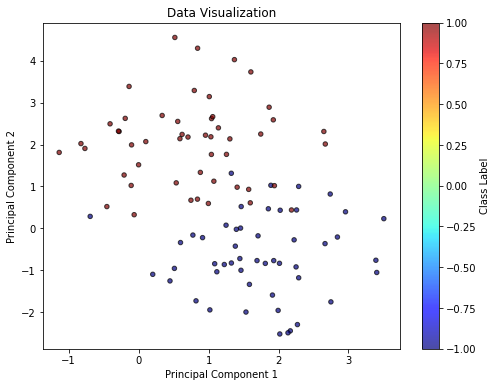

In [1]:
import numpy as np
import os
# Set the new path
new_path = '/Users/wty6162/Desktop/DRO_solver/dro'
# Change the current working directory
os.chdir(new_path)

# Prepare Data
from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification



X, y = classification_basic(d = 2, num_samples = 100, radius = 2, visualize = True)

# X, y = regression_basic(num_samples = 100, d = 2, noise = 1)

# Standard f-divergence DRO
We include chi2, cvar, kl, tv distance, which corresponds to the standard definition of (generalized) f-divergence.

The following steps including model fitting, and worst-case illustrations.

In [1]:
from dro.src.linear_model.chi2_dro import *
from dro.src.linear_model.cvar_dro import *
from dro.src.linear_model.tv_dro import *
from dro.src.linear_model.kl_dro import *


clf_model_chi2 = Chi2DRO(input_dim=2, model_type = 'logistic')
clf_model_cvar = CVaRDRO(input_dim=2, model_type = 'logistic')
clf_model_kl = KLDRO(input_dim = 2, model_type = 'logistic')
clf_model_tv = TVDRO(input_dim = 2, model_type = 'logistic')

In [4]:
## model fitting
clf_model_chi2.update({'eps': 1})
print(clf_model_chi2.fit(X, y))
clf_model_kl.update({'eps': 1})
print(clf_model_kl.fit(X, y))
clf_model_tv.update({'eps': 0.3})
print(clf_model_tv.fit(X, y))
clf_model_cvar.update({'alpha':0.8})
print(clf_model_cvar.fit(X, y))

{'theta': [-0.634717973292724, 1.9680341998100146], 'b': array(-0.51071442)}
{'theta': [-0.2180278621384498, 0.7358714381027359], 'dual': 0.16653030362514595, 'b': array(-0.23364987)}
{'theta': [-1.4132818466302876e-07, 2.8292473091650103e-07], 'threshold': array(0.69314691), 'b': array(-4.42341379e-08)}
{'theta': [-1.3466023865558, 3.8236983494071906], 'threshold': array(0.00019594), 'b': array(-0.7506087)}


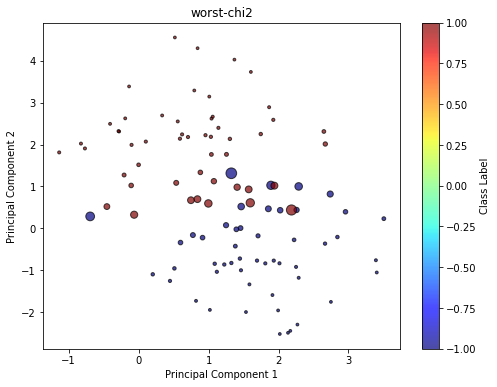

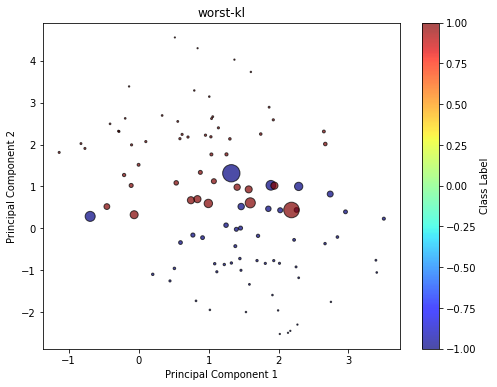

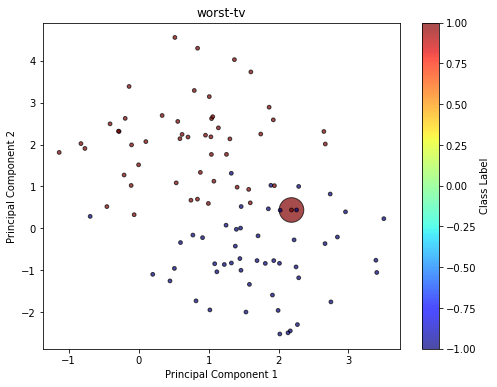

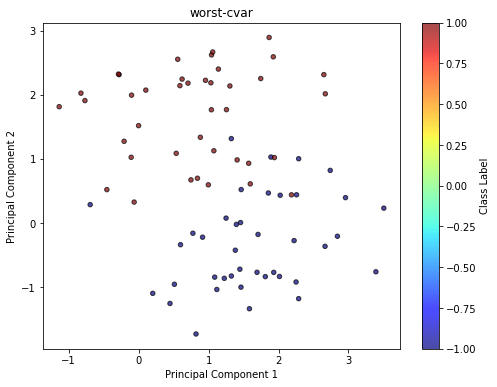

In [5]:
# worst case distribution for each method
worst_chi2 = clf_model_chi2.worst_distribution(X, y)
draw_classification(worst_chi2['sample_pts'][0], worst_chi2['sample_pts'][1], weight = worst_chi2['weight'], title = 'worst-chi2')

worst_kl = clf_model_kl.worst_distribution(X, y)
draw_classification(worst_kl['sample_pts'][0], worst_kl['sample_pts'][1], weight = worst_kl['weight'], title = 'worst-kl')

worst_tv = clf_model_tv.worst_distribution(X, y)
draw_classification(worst_tv['sample_pts'][0], worst_tv['sample_pts'][1], weight = worst_tv['weight'], title = 'worst-tv')

worst_cvar = clf_model_cvar.worst_distribution(X, y)
draw_classification(worst_cvar['sample_pts'][0], worst_cvar['sample_pts'][1], weight = worst_cvar['weight'], title = 'worst-cvar')

These f-divergence DROs are suitable for handling general distribution shifts with likelihood misspecification, while can be too worst-case in practice.

# Partial Distribution Shift
Some special kinds of DRO models can help handle problems of particular worst-case distribution shift, i.e., covariate shift (marginal_dro). Both of them are built from CVaR-DRO.

In [2]:
from dro.src.linear_model.conditional_dro import *
from dro.src.linear_model.marginal_dro import *

In [3]:
clf_model_margin = MarginalCVaRDRO(input_dim = 2, model_type = 'svm')

clf_model_cond = ConditionalCVaRDRO(input_dim = 2, model_type = 'logistic')

clf_model_margin.update({'alpha': 0.8})
clf_model_cond.update({'alpha': 0.4})

print('marginal', clf_model_margin.fit(X, y)['theta'])
print('conditional', clf_model_cond.fit(X, y))

marginal [-1.180139617545881, 2.363210356665714]
conditional {'theta': [-1.2843613411510384, 3.530303897479498], 'b': array(-0.6424686)}


We have not implemented the worst case distribution of both cases yet.

In [4]:
clf_model_margin.worst_distribution(X, y)

AttributeError: 'MarginalCVaRDRO' object has no attribute 'worst_distribution'

## Bayesian perspective
In some special examples where we have some priors or parametric information for the distribution shift, we can apply the following Bayesian DRO or Parametric DRO. These are usually built or designed with a under the f-dro framework.


In [ ]:
from dro.src.linear_model.Bayesian_dro import *